In [1]:
from datetime import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.pyplot as plt
from matplotlib import patheffects
from metpy.units import units
from metpy.plots import add_timestamp, ctables
import numpy as np
from scipy.ndimage import gaussian_filter, maximum_filter, minimum_filter
import xarray as xr

In [2]:
# Plotting Max and Min data points
def plot_maxmin_points(lon, lat, data, extrema, nsize, symbol, color='k',
                       plotValue=True, transform=None):
    
    outline_effect = [patheffects.withStroke(linewidth=2.5, foreground='black')]

    if (extrema == 'max'):
        data_ext = maximum_filter(data, nsize, mode='nearest')
    elif (extrema == 'min'):
        data_ext = minimum_filter(data, nsize, mode='nearest')
    else:
        raise ValueError('Value for hilo must be either max or min')

    mxy, mxx = np.where(data_ext == np.array(data))
    
    lon, lat = np.meshgrid(lons, lats)

    for i in range(len(mxy)):
        A = ax.text(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]], symbol, color=color, size=24,
                clip_on=True, clip_box=ax.bbox, horizontalalignment='center', verticalalignment='center',
                transform=transform)
        A.set_path_effects(outline_effect)
        
        a = np.array(data[mxy[i], mxx[i]])
        a_trunc = np.trunc(a)
        
        B = ax.text(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]],
                '\n' + str(a_trunc),
                color=color, size=12, clip_on=True, clip_box=ax.bbox, fontweight='bold',
                horizontalalignment='center', verticalalignment='top', transform=transform)
        B.set_path_effects(outline_effect)

In [3]:
# Open NCEP GFS dataset; change name accordingly to yours
ds = xr.open_dataset('US_SYNOPTIC/081416_0600H.f00.nc4')
ds

<xarray.Dataset>
Dimensions:                                            (sigma: 1,
                                                        potential_vorticity_surface: 2,
                                                        latitude: 101,
                                                        isobaric3: 31,
                                                        height_above_ground1: 3,
                                                        isobaric1: 21, time: 1,
                                                        height_above_ground3: 1,
                                                        longitude: 141,
                                                        isobaric4: 26)
Coordinates:
  * sigma                                              (sigma) float64 0.995
    reftime                                            datetime64[ns] ...
  * potential_vorticity_surface                        (potential_vorticity_surface) float64 ...
  * latitude                                           (latitude) float32 25....
  * isobaric3                                          (isobaric3) float64 10...
  * height_above_ground1                               (height_above_ground1) float64 ...
  * isobaric1                                          (isobaric1) float64 1e...
  * time                                               (time) datetime64[ns] ...
  * height_above_ground3                               (height_above_ground3) float64 ...
  * longitude                                          (longitude) float32 10...
  * isobaric4                                          (isobaric4) float64 1e...
Data variables: (12/18)
    Vertical_velocity_pressure_isobaric                (time, isobaric1, latitude, longitude) float32 ...
    Relative_humidity_isobaric                         (time, isobaric3, latitude, longitude) float32 ...
    Temperature_isobaric                               (time, isobaric3, latitude, longitude) float32 ...
    v-component_of_wind_sigma                          (time, sigma, latitude, longitude) float32 ...
    v-component_of_wind_isobaric                       (time, isobaric3, latitude, longitude) float32 ...
    u-component_of_wind_height_above_ground            (time, height_above_ground1, latitude, longitude) float32 ...
    ...                                                 ...
    u-component_of_wind_isobaric                       (time, isobaric3, latitude, longitude) float32 ...
    Dewpoint_temperature_height_above_ground           (time, height_above_ground3, latitude, longitude) float32 ...
    u-component_of_wind_sigma                          (time, sigma, latitude, longitude) float32 ...
    Vertical_velocity_pressure_sigma                   (time, sigma, latitude, longitude) float32 ...
    Geopotential_height_isobaric                       (time, isobaric3, latitude, longitude) float32 ...
    LatLon_721X1440-0p13S-180p00E                      int32 ...
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    ...                                                                                ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                         

In [4]:
# Open another NCEP GFS dataset; change name accordingly to yours; secondary
ds1 = xr.open_dataset('US_SYNOPTIC/081416_0600H.f03.nc4')
ds1

<xarray.Dataset>
Dimensions:                                            (time1: 1, sigma: 1,
                                                        potential_vorticity_surface: 2,
                                                        latitude: 101,
                                                        height_above_ground2: 1,
                                                        isobaric3: 21,
                                                        isobaric2: 26,
                                                        height_above_ground4: 3,
                                                        time: 1, bounds_dim: 2,
                                                        longitude: 141,
                                                        isobaric4: 31)
Coordinates:
  * time1                                              (time1) datetime64[ns] ...
  * sigma                                              (sigma) float64 0.995
    reftime                                            datetime64[ns] ...
  * potential_vorticity_surface                        (potential_vorticity_surface) float64 ...
  * latitude                                           (latitude) float32 25....
  * height_above_ground2                               (height_above_ground2) float64 ...
  * isobaric3                                          (isobaric3) float64 1e...
  * isobaric2                                          (isobaric2) float64 1e...
  * height_above_ground4                               (height_above_ground4) float64 ...
  * time                                               (time) datetime64[ns] ...
  * longitude                                          (longitude) float32 10...
  * isobaric4                                          (isobaric4) float64 10...
Dimensions without coordinates: bounds_dim
Data variables: (12/20)
    time_bounds                                        (time, bounds_dim) datetime64[ns] ...
    Vertical_velocity_pressure_isobaric                (time1, isobaric3, latitude, longitude) float32 ...
    Relative_humidity_isobaric                         (time1, isobaric4, latitude, longitude) float32 ...
    Temperature_isobaric                               (time1, isobaric4, latitude, longitude) float32 ...
    v-component_of_wind_sigma                          (time1, sigma, latitude, longitude) float32 ...
    v-component_of_wind_isobaric                       (time1, isobaric4, latitude, longitude) float32 ...
    ...                                                 ...
    u-component_of_wind_isobaric                       (time1, isobaric4, latitude, longitude) float32 ...
    Dewpoint_temperature_height_above_ground           (time1, height_above_ground2, latitude, longitude) float32 ...
    u-component_of_wind_sigma                          (time1, sigma, latitude, longitude) float32 ...
    Vertical_velocity_pressure_sigma                   (time1, sigma, latitude, longitude) float32 ...
    Geopotential_height_isobaric                       (time1, isobaric4, latitude, longitude) float32 ...
    LatLon_721X1440-0p13S-180p00E                      int32 ...
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    ...                                                                                ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat

In [5]:
# Grab lat/lon values (NAM will be 2D)
lats = ds.latitude
lons = ds.longitude

# Select and grab data
w = ds['Vertical_velocity_pressure_isobaric']
geop = ds['Geopotential_height_isobaric'] 
uwnd = ds['u-component_of_wind_isobaric']
vwnd = ds['v-component_of_wind_isobaric']
rain = ds1['Precipitation_rate_surface_3_Hour_Average']

# Select and grab 700-hPa geopotential heights, wind components, and vertical velocity
# Then, smooth with gaussian_filter
w_700 = gaussian_filter(w.sel(isobaric1=70000).data[0], sigma=3.0) * units('Pa/s')
w_700ub = w_700.to('microbar/second')
hght_700 = gaussian_filter(geop.sel(isobaric3=70000).data[0], sigma=3.0) * units('m')
hght_700dm = hght_700.to(units.decameter)

# Add precipitation and convert to mm/hr. Smooth with gaussian_filter
precip = gaussian_filter(rain.data[0], sigma=3.0) * units('kg/m^2/s')
mmhr1 = precip * (1 * units('m^3')) / (1000 * units('kg'))
mmhr2 = mmhr1 * (1000 * units('mm')) / (1 * units.meters)
mmhr = mmhr2.to('mm/hr') #Conversion

# Create a clean datetime object for plotting based on time of Geopotential heights
vtime = datetime.strptime(str(ds.time.data[0].astype('datetime64[ms]')),
                          '%Y-%m-%dT%H:%M:%S.%f')

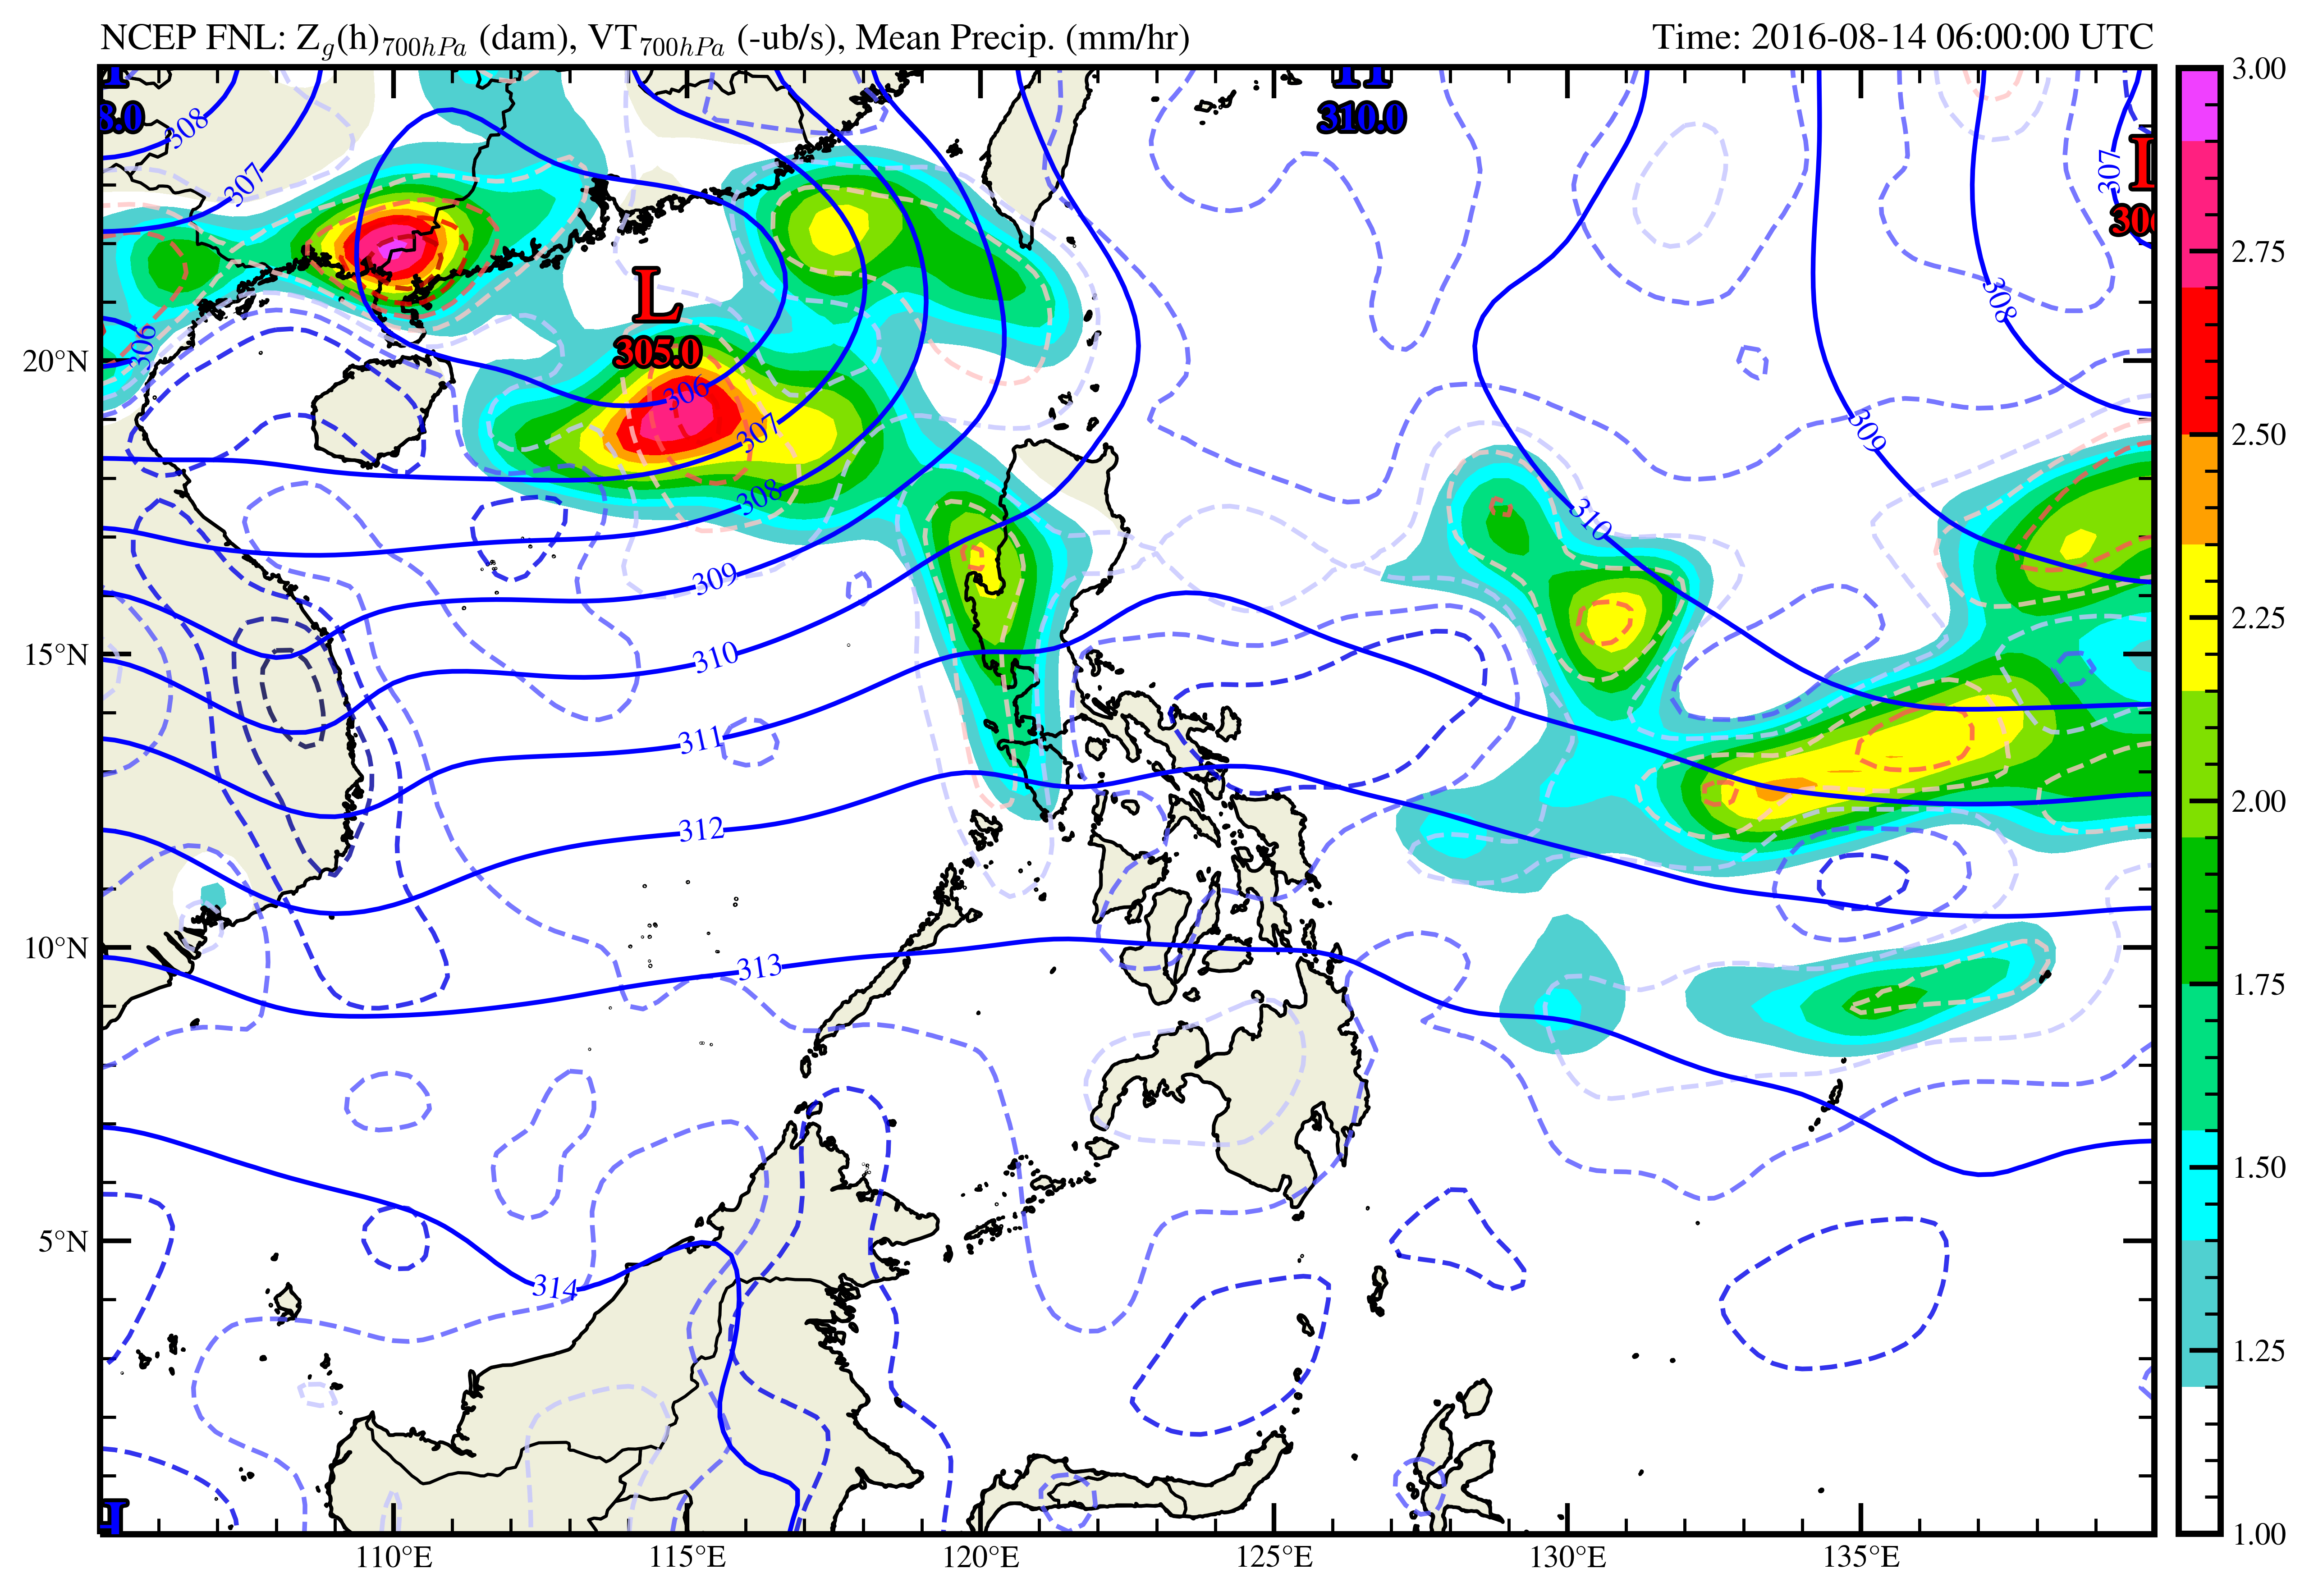

In [7]:
# Set up the projection that will be used for plotting
mapcrs = ccrs.PlateCarree()

# Set up the projection of the data; if lat/lon then PlateCarree is what you want
datacrs = ccrs.PlateCarree()

# Start the figure and create plot axes with proper projection
fig = plt.figure(1, figsize=(14, 12))
ax = plt.subplot(111, projection=datacrs)
ax.set_extent([105, 140, 0, 25], ccrs.PlateCarree())

# Add geopolitical boundaries for map reference
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=1.15)
ax.add_feature(cfeature.STATES.with_scale('50m'))
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'], zorder=1)
ax.add_feature(land_10m)

# Highlight boundary on VT
clevs_700_vtt = np.arange(-6.5, 3.5, 1)
ax.contour(lons, lats, w_700ub, clevs_700_vtt, cmap='seismic_r', 
           transform=datacrs, alpha=0.8, linestyles='--')

# Plot 700-hPa Geopotential Heights in meters
clevs_700_hght = np.arange(305, 316, 1)
cs = ax.contour(lons, lats, hght_700dm, clevs_700_hght, colors='blue',
                transform=datacrs)
ax.clabel(cs, fmt='%d')

# Use MetPy's colortable
norm, cmap = ctables.registry.get_with_range('precipitation', 1, 5)

# Plot contours of Average Total Precipitation Rate
limit = np.arange(1, 3.05, 0.05)
cf = ax.contourf(lons, lats, mmhr, limit, norm=norm, cmap=cmap, transform=datacrs)
cbar = plt.colorbar(cf, orientation='vertical', pad=0.01, aspect=35, shrink=0.542)
cbar.ax.minorticks_on()
cbar.ax.tick_params(which='major', length=10, width=1.5, top=True, right=True, direction='in')
cbar.ax.tick_params(which='minor', length=5, width=1, top=True, right=True, direction='in')

# Plot Highs and Lows (Min/Max) values of Geopotential Height
plot_maxmin_points(lons, lats, hght_700dm, 'max', 40, symbol='H', color='b', transform=datacrs)
plot_maxmin_points(lons, lats, hght_700dm, 'min', 40, symbol='L', color='r', transform=datacrs)

# Make some nice titles for the plot (one right, one left)
plt.title('NCEP FNL: Z$_{g}$(h)$_{700hPa}$ (dam), VT$_{700hPa}$ (-ub/s), Mean Precip. (mm/hr)', loc='left')
plt.title('Time: {} UTC'.format(vtime), loc='right')

# Set X and Y-ticks for Latitude and Longitude Coordinates
ax.set_yticks(lats, 5, crs=ccrs.PlateCarree())
ax.set_xticks(lons, 5, crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
long_formatter = cticker.LongitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.xaxis.set_major_formatter(long_formatter)
ax.set_xticks(ax.get_xticks()[1:7]) #Hide end points of longitude tickmarks
ax.set_yticks(ax.get_yticks()[1:5]) #Hide end points of latitude tickmarks
ax.minorticks_on()
ax.tick_params(which='major', length=10, width=1.5, top=True, right=True, direction='in')
ax.tick_params(which='minor', length=5, width=1, top=True, right=True, direction='in')

# Adjust image and show
plt.subplots_adjust(bottom=0, top=1)
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['figure.dpi'] = 500
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.savefig('GPM, VT, Rains.jpg', bbox_inches="tight")
plt.show()